## Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

## Be sure to used Tensorflow 2.0

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [3]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

4423680/4422102 [==============================] - 0s 0us/step
(10000, 784)
(10000,)


## Plot one of the data

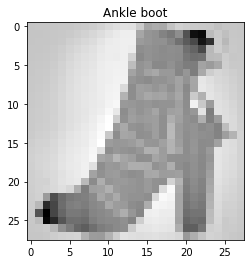

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Create the model
![](images/simple_nn.png)

# Create the model

In [5]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

W1118 19:44:48.978875 140736100387648 deprecation.py:506] From /opt/conda/envs/Python-3.6-WMLCE/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W1118 19:44:49.023885 140736100387648 backend.py:548] OMP_NUM_THREADS is no longer used by the default Keras config. To configure the number of threads, use tf.config.threading APIs.


[[0.19328007 0.04300444 0.01554152 0.06350102 0.06414466 0.05374321
  0.02001402 0.03754538 0.04541505 0.46381068]] [9]


## Model Summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [7]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [8]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 111us/sample - loss: 0.8898 - acc: 0.7051 - val_loss: 0.6294 - val_acc: 0.7830
Epoch 2/10
8000/8000 [==============================] - 1s 73us/sample - loss: 0.5346 - acc: 0.8154 - val_loss: 0.5318 - val_acc: 0.8110
Epoch 3/10
8000/8000 [==============================] - 1s 73us/sample - loss: 0.4493 - acc: 0.8413 - val_loss: 0.4863 - val_acc: 0.8280
Epoch 4/10
8000/8000 [==============================] - 1s 76us/sample - loss: 0.4008 - acc: 0.8594 - val_loss: 0.4583 - val_acc: 0.8315
Epoch 5/10
8000/8000 [==============================] - 1s 75us/sample - loss: 0.3658 - acc: 0.8706 - val_loss: 0.4511 - val_acc: 0.8435
Epoch 6/10
8000/8000 [==============================] - 1s 72us/sample - loss: 0.3381 - acc: 0.8844 - val_loss: 0.4267 - val_acc: 0.8485
Epoch 7/10
8000/8000 [==============================] - 1s 74us/sample - loss: 0.3148 - acc: 0.8874 - val_loss: 0.4190 - val_acc:

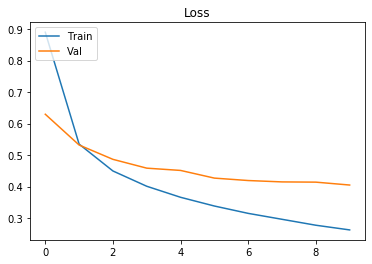

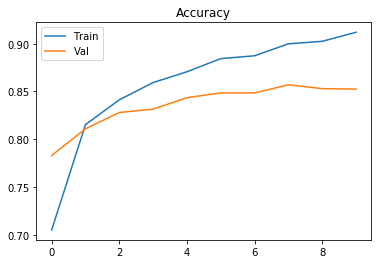

In [10]:
loss_curve = history.history["loss"]
#acc_curve = history.history["accuracy"]
acc_curve = history.history["acc"]


loss_val_curve = history.history["val_loss"]
#acc_val_curve = history.history["val_accuracy"]
acc_val_curve = history.history["val_acc"]


plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [11]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.4469 - acc: 0.8428
Test Loss 0.4468768344402313
Test Accuracy 0.8428
